In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 363 kB/s 


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers
from fast_ml.model_development import train_valid_test_split
from sklearn import metrics


In [ ]:
df=pd.read_excel("Complete Plant data set.xlsx",header=0)
df

,arduino-ethernet_light-intensity,arduino-ethernet_temperature,arduino-ethernet_humidity,arduino-ethernet_soil_moisture,arduino-ethernet_water-supply
0,1201.667,33.4,10,31.476,1
1,0.000,23.3,5,44.868,1
2,0.000,23.7,95,46.530,1
3,0.000,24.0,13,36.950,1
4,0.000,24.7,5,44.575,1
...,...,...,...,...,...
2529,148.333,36.5,95,39.687,1
2530,156.667,36.5,95,34.995,1
2531,178.333,35.5,95,35.191,1
2532,166.667,35.6,95,17.400,1


In [ ]:
dfp=df[df['arduino-ethernet_water-supply']==1]

In [ ]:
dfn=df[df['arduino-ethernet_water-supply']==0]

In [ ]:
X_trainp, y_trainp, X_validp, y_validp, X_testp, y_testp = train_valid_test_split(dfp, target = 'arduino-ethernet_water-supply', 
                                                                            method='random', sort_by_col=None,
                                                                            train_size=0.8, valid_size=0.19999, test_size=0.00001)

In [ ]:
X_trainn, y_trainn, X_validn, y_validn, X_testn, y_testn = train_valid_test_split(dfn, target = 'arduino-ethernet_water-supply', 
                                                                            method='random', sort_by_col=None,
                                                                            train_size=0.8, valid_size=0.19999, test_size=0.00001)

In [ ]:
X_train=X_trainp.append(X_trainn)
X_test=X_testp.append(X_testn)
y_train=y_trainp.append(y_trainn)
y_test=y_testp.append(y_testn)
X_valid=X_validp.append(X_validn)
y_valid=y_validp.append(y_validn)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(layers.Normalization(axis=-1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                        

In [ ]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [ ]:
# Train model
history = model.fit(X_train,
                    y_train,
                    epochs=20, verbose=0,
                    validation_data=(X_valid, y_valid))

In [ ]:
history.history['accuracy']

[0.7235932946205139,
 0.8208292126655579,
 0.8079960346221924,
 0.8099703788757324,
 0.8188548684120178,
 0.8489634990692139,
 0.8479763269424438,
 0.8524185419082642,
 0.8637709617614746,
 0.8790720701217651,
 0.8479763269424438,
 0.8538993000984192,
 0.8820335865020752,
 0.874136209487915,
 0.8919052481651306,
 0.8928924202919006,
 0.901776909828186,
 0.9057255387306213,
 0.898321807384491,
 0.9047384262084961]

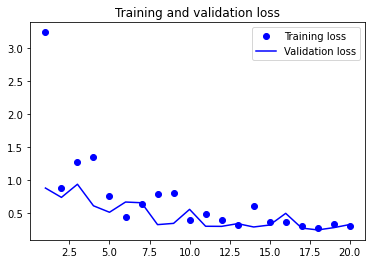

In [ ]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')\

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 21ms/step


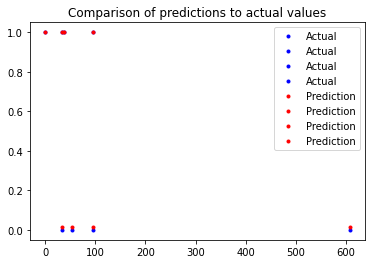

In [ ]:
# Plot predictions against actual values
predictions = model.predict(X_test)
predictions=pd.Series(predictions.reshape(y_test.shape[0]))
# predictions=predictions.apply(lambda x: 1 if x>0.5 else 0)
plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [ ]:
df=pd.read_csv("test_data (1).csv",header=0)
df

,arduino-ethernet_light-intensity,arduino-ethernet_temperature,arduino-ethernet_humidity,arduino-ethernet_soil_moisture,Actual Value
0,120.833,26.9,95,49.658,1
1,85.833,30.7,95,43.597,1
2,90.833,35.3,95,9.091,1
3,125.833,27.0,95,49.267,1
4,0.000,24.0,13,36.950,1
...,...,...,...,...,...
357,10.830,26.7,95,40.960,1
358,6.670,26.6,95,52.890,0
359,0.000,26.6,95,50.830,0
360,0.000,26.4,95,43.600,1


In [ ]:
x = df.iloc[:, 0:4]

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
results = model.evaluate(X, y)

12/12 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9751


The Following is the model trained with help of transfer learning

In [ ]:
model1 = tf.keras.models.load_model('trained_model_finalized')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 4)                9         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 20)                100       
                                                                 
 sequential_6 (Sequential)   (None, 64)                1344      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,518
Trainable params: 165
Non-trainable params: 1,353
_________________________________________________________________


In [ ]:
results = model1.evaluate(X, y)

12/12 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9199
